# AutoAI

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Austral/Fundamentos_del_aprendizaje_automatico/aug_train.csv.zip', index_col='enrollee_id')

In [3]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


# TPOT

In [4]:
! pip install --quiet tpot

In [5]:
# Importo las librerias
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
# TPot no tiene ningun preprocesamiento cuando la columna es de tipo string. Se tiene que realizar el preprocesamiento de forma manual
columnasObject = df.select_dtypes(include=np.object).columns
for columna in columnasObject:
  df = pd.concat([df.drop(columna, axis=1), pd.get_dummies(df[columna])], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df.target, train_size=0.75, test_size=0.25, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14368, 186)
(4790, 186)
(14368,)
(4790,)


In [9]:
generations=3
population_size=5
pipeline_optimizer = TPOTClassifier(
    generations=generations, 
    population_size=population_size, 
    verbosity=2, 
    random_state=42,
    memory='auto',
    n_jobs=-1,
    scoring='f1',
    template='Transformer-Selector-Classifier',
    config_dict='TPOT light')

In [10]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5372913025740116

Generation 2 - Current best internal CV score: 0.5483847918449262

Generation 3 - Current best internal CV score: 0.5483847918449262

Best pipeline: MultinomialNB(VarianceThreshold(MinMaxScaler(input_matrix), threshold=0.0001), alpha=0.01, fit_prior=False)


TPOTClassifier(config_dict='TPOT light', generations=3, memory='auto',
               n_jobs=-1, population_size=5, random_state=42, scoring='f1',
               template='Transformer-Selector-Classifier', verbosity=2)

In [11]:
print(pipeline_optimizer.score(X_test, y_test))

0.5376561972306653


In [12]:
pipeline_optimizer.export('tpot_export_default_pipeline.py')

# Pycaret

In [13]:
! pip install --quiet pycaret
! pip install --quiet shap

In [14]:
from pycaret.classification import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Austral/Fundamentos_del_aprendizaje_automatico/aug_train.csv.zip', index_col='enrollee_id')

In [16]:
clf = setup(data = df, target = 'target',silent=True,log_experiment = True,
            session_id=1, fix_imbalance=True,experiment_name = 'train')

,Description,Value
0,session_id,1
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(19158, 13)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
# Entrena todos los modelos con los parametros por defecto, la funcion devuelve el mejor modelo
bestModel = compare_models(sort = 'F1',fold=3,exclude=['gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7764,0.7935,0.7293,0.5399,0.6203,0.4669,0.4776,5.4233
ridge,Ridge Classifier,0.7761,0.0000,0.7299,0.5394,0.6203,0.4666,0.4774,0.3733
lda,Linear Discriminant Analysis,0.7757,0.7921,0.7293,0.5387,0.6196,0.4657,0.4765,0.8933
ada,Ada Boost Classifier,0.7896,0.7915,0.5908,0.5783,0.5842,0.4435,0.4437,1.6600
lightgbm,Light Gradient Boosting Machine,0.7952,0.8010,0.5625,0.5969,0.5791,0.4439,0.4443,1.2333
rf,Random Forest Classifier,0.7879,0.7950,0.4985,0.5909,0.5407,0.4041,0.4067,3.2667
et,Extra Trees Classifier,0.7815,0.7744,0.4923,0.5746,0.5301,0.3889,0.3910,4.2433
svm,SVM - Linear Kernel,0.7812,0.0000,0.4780,0.5716,0.5088,0.3736,0.3818,1.1500
dt,Decision Tree Classifier,0.7293,0.6407,0.4625,0.4600,0.4612,0.2804,0.2805,0.5900
knn,K Neighbors Classifier,0.5376,0.6591,0.7677,0.3223,0.4540,0.1564,0.2017,2.7567


In [18]:
# Optimizacion de hiper parametros
bestModel = tune_model(bestModel,optimize = 'F1',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7837,0.8011,0.7382,0.5507,0.6308,0.4823,0.4927
1,0.7694,0.7864,0.7435,0.5279,0.6174,0.4591,0.4729
2,0.7819,0.7958,0.7196,0.5494,0.6231,0.4735,0.4820
Mean,0.7783,0.7944,0.7338,0.5427,0.6238,0.4716,0.4825
SD,0.0064,0.0061,0.0102,0.0104,0.0055,0.0096,0.0081


In [19]:
# Multiples graficos para evaluar los modelos
evaluate_model(bestModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7919,0.8122,0.5134,0.5972,0.5522,0.4177,0.4197
1,0.8039,0.8276,0.6119,0.6065,0.6092,0.4783,0.4783
2,0.7964,0.8078,0.5893,0.5946,0.5919,0.4563,0.4563
3,0.7897,0.8102,0.5923,0.5785,0.5853,0.4445,0.4445
4,0.7949,0.7788,0.5268,0.6041,0.5628,0.4297,0.4314
5,0.7778,0.7815,0.5923,0.5528,0.5718,0.4220,0.4225
6,0.7882,0.7854,0.5833,0.5765,0.5799,0.4383,0.4383
7,0.7972,0.7941,0.5774,0.5988,0.5879,0.4534,0.4535
8,0.8106,0.8131,0.5893,0.6306,0.6092,0.4844,0.4849
9,0.7949,0.8016,0.5833,0.5921,0.5877,0.4512,0.4513


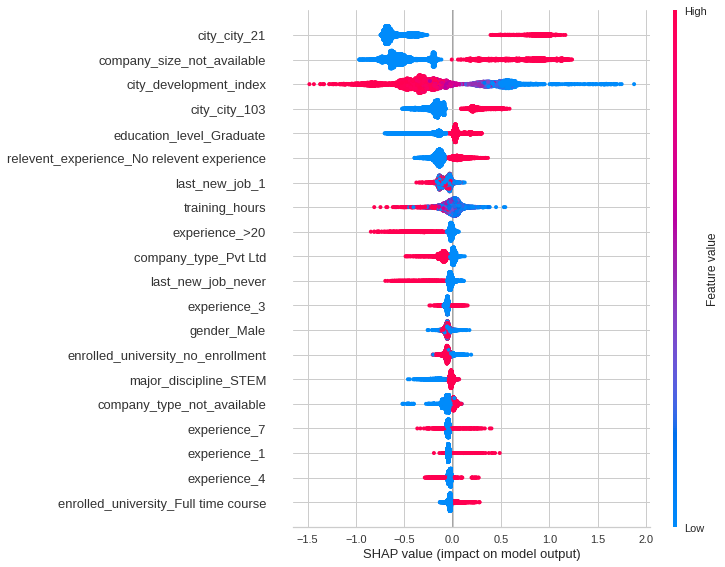

In [20]:
bestModel = create_model('lightgbm')
interpret_model(bestModel)

In [21]:
bestModel

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# H2o

In [22]:
! pip install -q h2o

     |████████████████████████████████| 175.8 MB 34 kB/s 


In [23]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjyslghhw
  JVM stdout: /tmp/tmpjyslghhw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjyslghhw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_71hfe8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [24]:
df = pd.read_csv('/content/drive/MyDrive/Austral/Fundamentos_del_aprendizaje_automatico/aug_train.csv.zip', index_col='enrollee_id')

In [25]:
df = h2o.H2OFrame(df) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
# Defino cuales columnas son las variables de entrenamiento y cual es el target. 
x = df.columns
y = "target"
x.remove(y)
print(x)

['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']


In [27]:
df[y] = df[y].asfactor()


In [28]:
# Entreno el modelo
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2)
aml.train(x=x, y=y, training_frame=df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_2_AutoML_1_20210924_165057

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.12352759255629163
RMSE: 0.3514649236499876
LogLoss: 0.39102709161837285
Null degrees of freedom: 10051
Residual degrees of freedom: 10048
Null deviance: 11214.836794019955
Residual deviance: 7861.208649895768
AIC: 7869.208649895768
AUC: 0.8673815066475394
AUCPR: 0.6736351702531149
Gini: 0.7347630132950789

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30032854715376467: 


,,0,1,Error,Rate
0,0,6257.0,1323.0,0.1745,(1323.0/7580.0)
1,1,615.0,1857.0,0.2488,(615.0/2472.0)
2,Total,6872.0,3180.0,0.1928,(1938.0/10052.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.300329,0.657113,207.0
1,max f2,0.134311,0.755430,295.0
2,max f0point5,0.530892,0.646824,117.0
3,max accuracy,0.530892,0.824910,117.0
4,max precision,0.766390,1.000000,0.0
5,max recall,0.053611,1.000000,388.0
6,max specificity,0.766390,1.000000,0.0
7,max absolute_mcc,0.300329,0.533992,207.0
8,max min_per_class_accuracy,0.223517,0.793689,238.0
9,max mean_per_class_accuracy,0.203927,0.796540,248.0



Gains/Lift Table: Avg response rate: 24.59 %, avg score: 25.03 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010048,0.710224,3.663735,3.663735,0.900990,0.728192,0.900990,0.728192,0.036812,0.036812,266.373482,266.373482,0.035493
1,2,0.020096,0.691314,3.341648,3.502692,0.821782,0.699630,0.861386,0.713911,0.033576,0.070388,234.164824,250.269153,0.066694
2,3,0.030044,0.679697,3.456392,3.487360,0.850000,0.685470,0.857616,0.704494,0.034385,0.104773,245.639159,248.736042,0.099101
3,4,0.040092,0.667704,3.220866,3.420571,0.792079,0.673709,0.841191,0.696778,0.032362,0.137136,222.086578,242.057144,0.128693
4,5,0.050040,0.655631,2.805777,3.298346,0.690000,0.661170,0.811133,0.689699,0.027913,0.165049,180.577670,229.834585,0.152516
5,6,0.100080,0.610187,2.910305,3.104326,0.715706,0.631032,0.763419,0.660366,0.145631,0.310680,191.030516,210.432550,0.279281
6,7,0.150020,0.573433,2.519189,2.909539,0.619522,0.592632,0.715517,0.637818,0.125809,0.436489,151.918862,190.953856,0.379892
7,8,0.200060,0.534578,2.255486,2.745944,0.554672,0.554323,0.675286,0.616934,0.112864,0.549353,125.548650,174.594423,0.463205
8,9,0.300040,0.358173,1.743874,2.412032,0.428856,0.470364,0.593170,0.568093,0.174353,0.723706,74.387448,141.203173,0.561832
9,10,0.400020,0.171593,1.181465,2.104467,0.290547,0.237839,0.517533,0.485550,0.118123,0.841828,18.146484,110.446652,0.585892




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1394314034104517
RMSE: 0.37340514647022705
LogLoss: 0.43696570904355375
Null degrees of freedom: 19157
Residual degrees of freedom: 19154
Null deviance: 21519.850041529353
Residual deviance: 16742.77810771281
AIC: 16750.77810771281
AUC: 0.8014279287194188
AUCPR: 0.5368100026768747
Gini: 0.6028558574388376

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2784619445927707: 


,,0,1,Error,Rate
0,0,11659.0,2722.0,0.1893,(2722.0/14381.0)
1,1,1274.0,3503.0,0.2667,(1274.0/4777.0)
2,Total,12933.0,6225.0,0.2086,(3996.0/19158.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.278462,0.636793,221.0
1,max f2,0.175992,0.704829,271.0
2,max f0point5,0.418197,0.599854,171.0
3,max accuracy,0.418197,0.799353,171.0
4,max precision,0.614346,0.603950,70.0
5,max recall,0.029884,1.000000,399.0
6,max specificity,0.819490,0.999930,0.0
7,max absolute_mcc,0.332936,0.502782,202.0
8,max min_per_class_accuracy,0.207626,0.767427,253.0
9,max mean_per_class_accuracy,0.269160,0.772440,225.0



Gains/Lift Table: Avg response rate: 24.93 %, avg score: 24.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,0.718313,2.276775,2.276775,0.567708,0.740320,0.567708,0.740320,0.022818,0.022818,127.677543,127.677543,0.017046
1,2,0.020044,0.695616,2.360327,2.318551,0.588542,0.706534,0.578125,0.723427,0.023655,0.046473,136.032683,131.855113,0.035208
2,3,0.030014,0.678856,2.435676,2.357457,0.607330,0.686904,0.587826,0.711295,0.024283,0.070756,143.567618,135.745702,0.054276
3,4,0.040035,0.666437,2.464766,2.384319,0.614583,0.672302,0.594524,0.701534,0.024702,0.095457,146.476607,138.431926,0.073832
4,5,0.050005,0.654371,2.372685,2.382000,0.591623,0.660396,0.593946,0.693332,0.023655,0.119112,137.268456,138.199960,0.092063
5,6,0.100010,0.609280,2.419676,2.400838,0.603340,0.631114,0.598643,0.662223,0.120996,0.240109,141.967622,140.083791,0.186636
6,7,0.150016,0.569534,2.365254,2.388977,0.589770,0.589092,0.595685,0.637846,0.118275,0.358384,136.525444,138.897676,0.277583
7,8,0.200021,0.527877,2.382000,2.387232,0.593946,0.549376,0.595251,0.615729,0.119112,0.477496,138.199960,138.723247,0.369646
8,9,0.300031,0.354638,2.174778,2.316414,0.542276,0.459682,0.577592,0.563713,0.217501,0.694997,117.477820,131.641438,0.526163
9,10,0.399990,0.173641,0.946596,1.974094,0.236031,0.240282,0.492235,0.482887,0.094620,0.789617,-5.340418,97.409381,0.519052


In [29]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_2_AutoML_1_20210924_165057,0.801428,0.436966,0.53681,0.227986,0.373405,0.139431
StackedEnsemble_AllModels_1_AutoML_1_20210924_165057,0.801108,0.436754,0.536733,0.229249,0.373289,0.139345
StackedEnsemble_BestOfFamily_1_AutoML_1_20210924_165057,0.79998,0.438028,0.536974,0.231878,0.373748,0.139687
XGBoost_2_AutoML_1_20210924_165057,0.798378,0.445372,0.534278,0.232382,0.377637,0.14261
GBM_1_AutoML_1_20210924_165057,0.797215,0.439996,0.533848,0.233543,0.374662,0.140371
GBM_2_AutoML_1_20210924_165057,0.795578,0.443613,0.532613,0.234721,0.376349,0.141639
GLM_1_AutoML_1_20210924_165057,0.795055,0.454627,0.537203,0.235399,0.381728,0.145717
GBM_3_AutoML_1_20210924_165057,0.793268,0.444674,0.530822,0.240849,0.376926,0.142073
XGBoost_1_AutoML_1_20210924_165057,0.792,0.457402,0.528893,0.241726,0.381843,0.145804
GBM_4_AutoML_1_20210924_165057,0.791973,0.448097,0.529127,0.237521,0.378647,0.143373


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_2_AutoML_1_20210924_165057


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29992391511291344: 


,,0,1,Error,Rate
0,0,11876.0,2505.0,0.1742,(2505.0/14381.0)
1,1,1185.0,3592.0,0.2481,(1185.0/4777.0)
2,Total,13061.0,6097.0,0.1926,(3690.0/19158.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

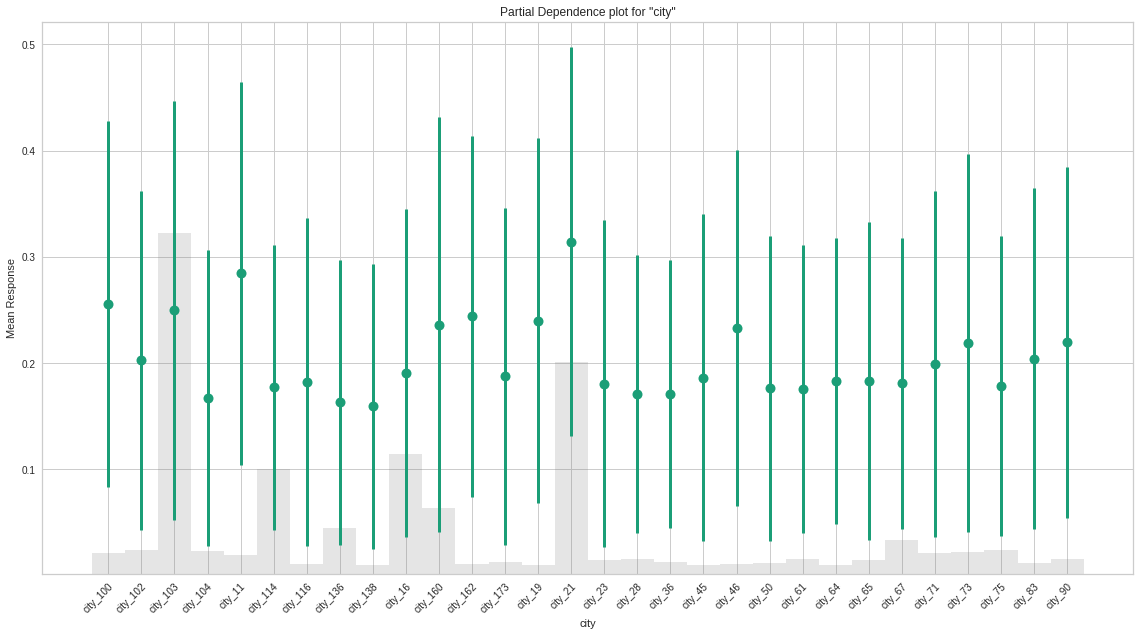

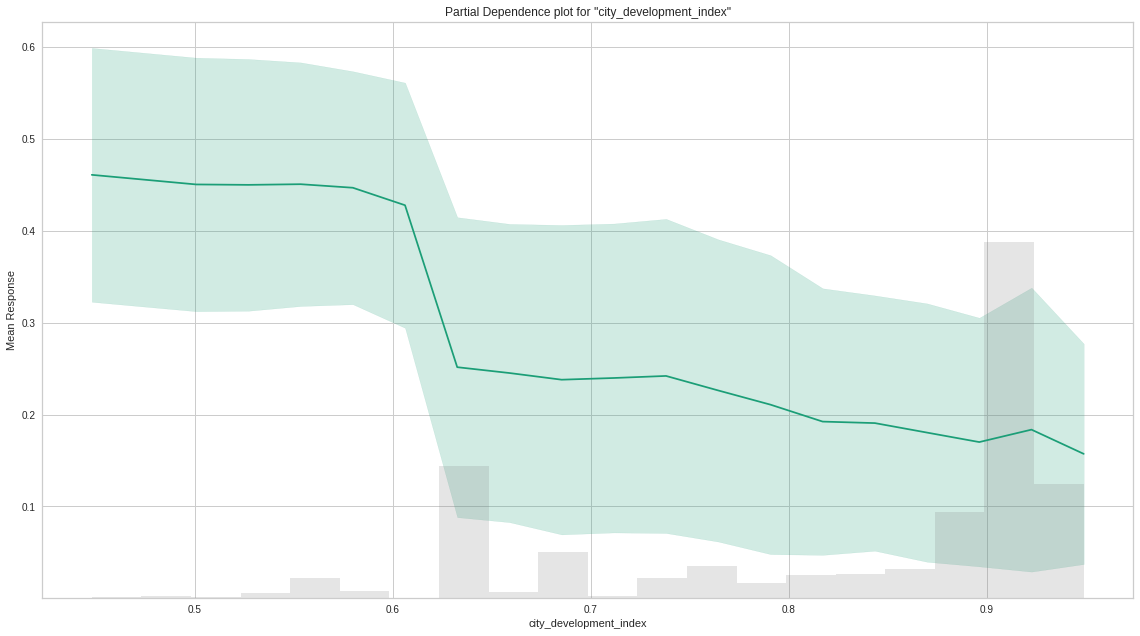

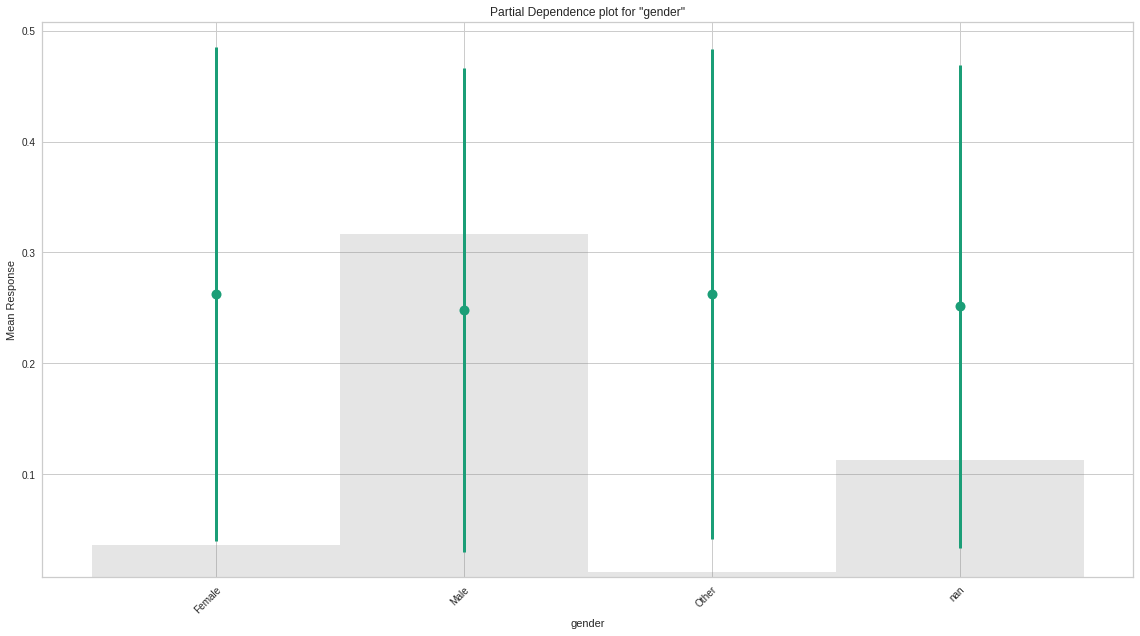

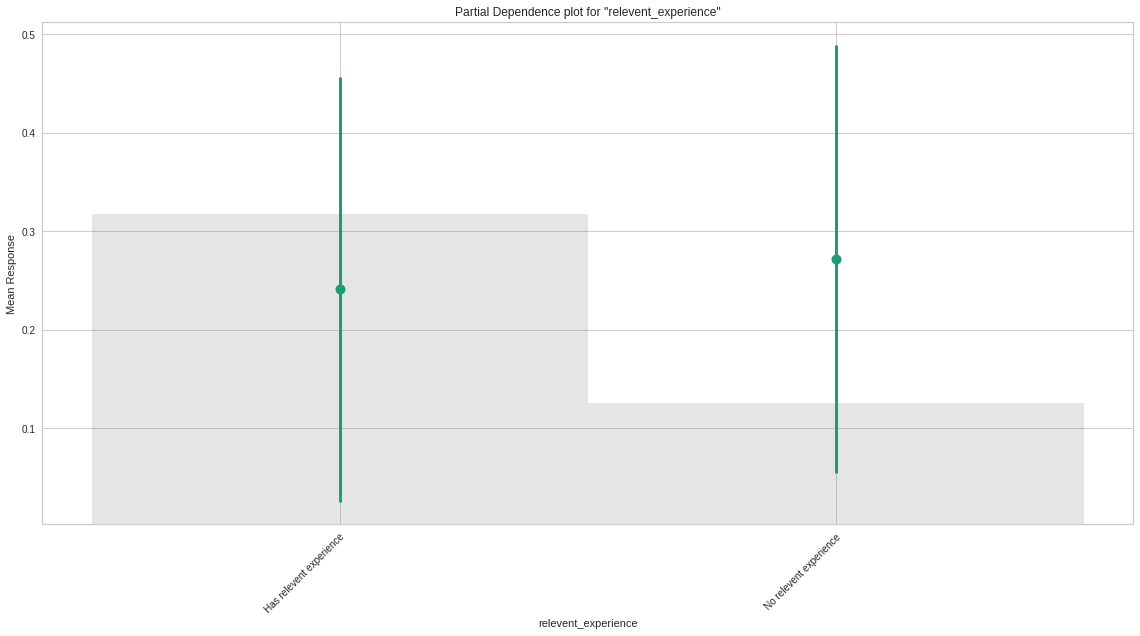

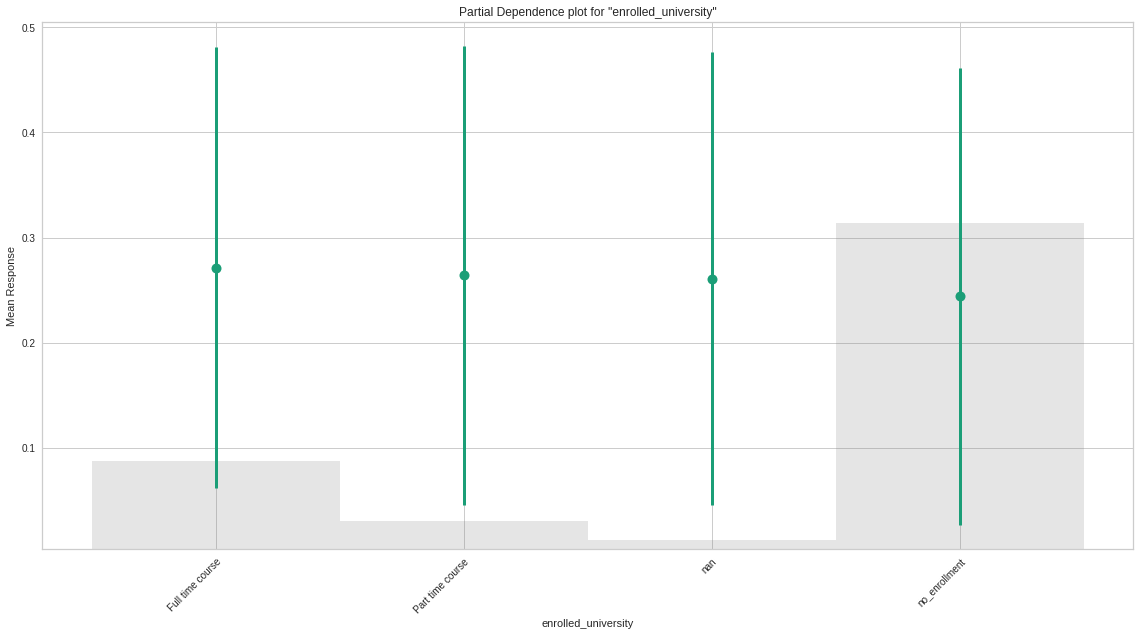

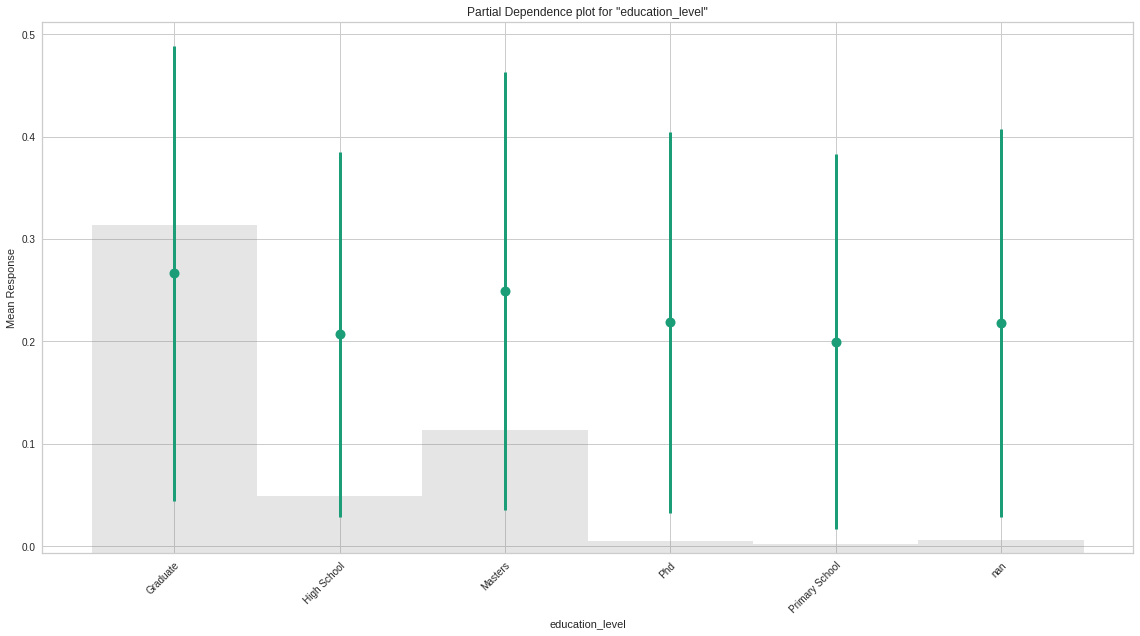

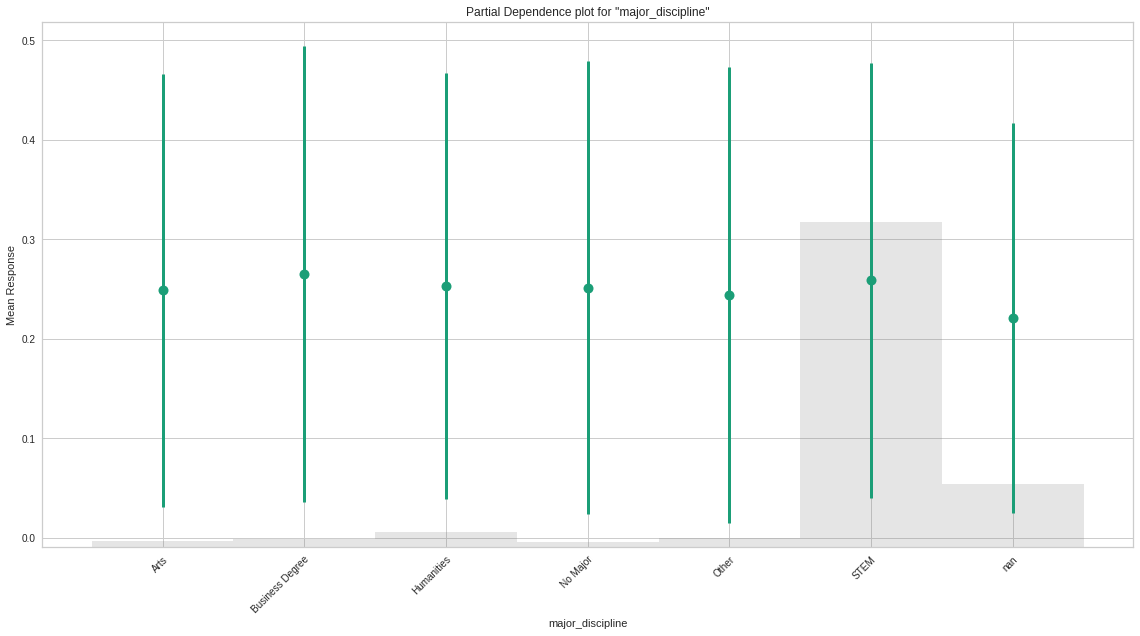

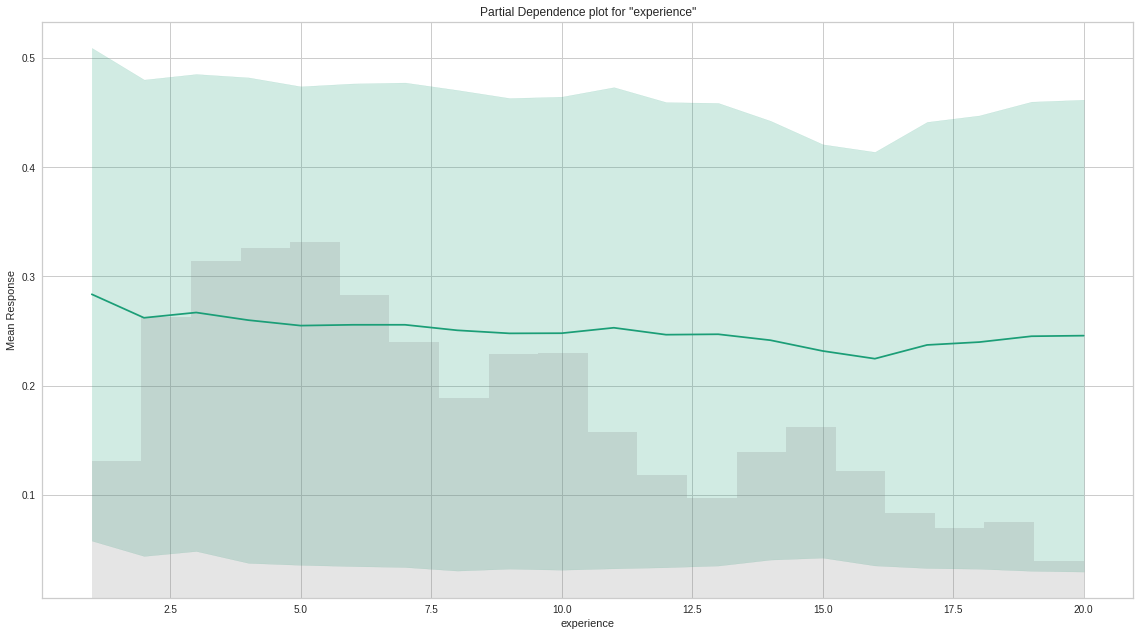

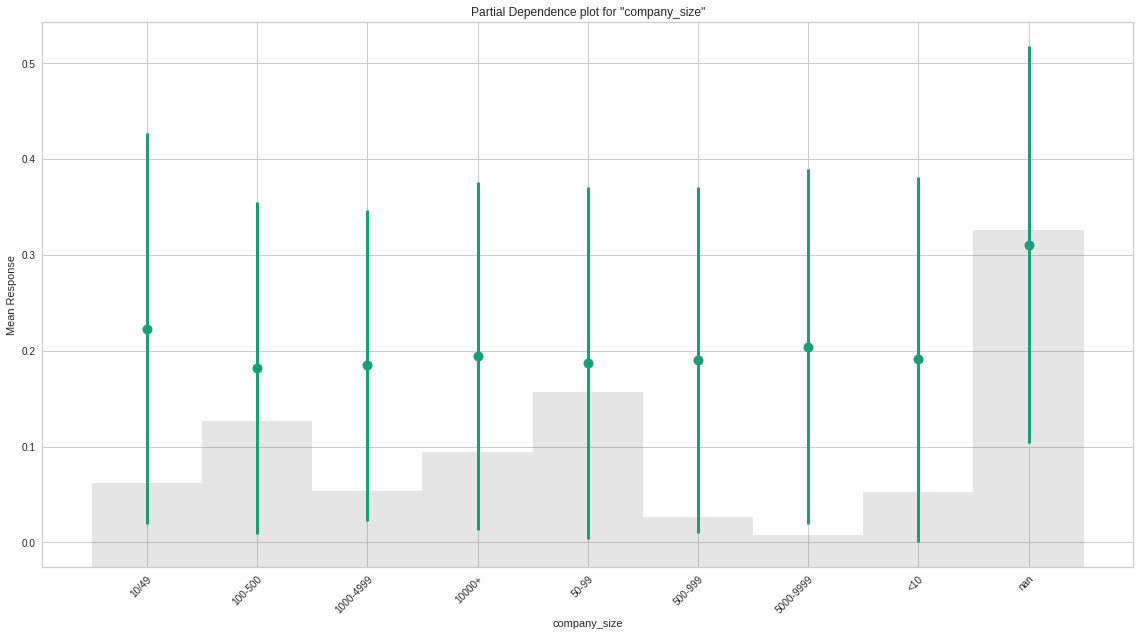

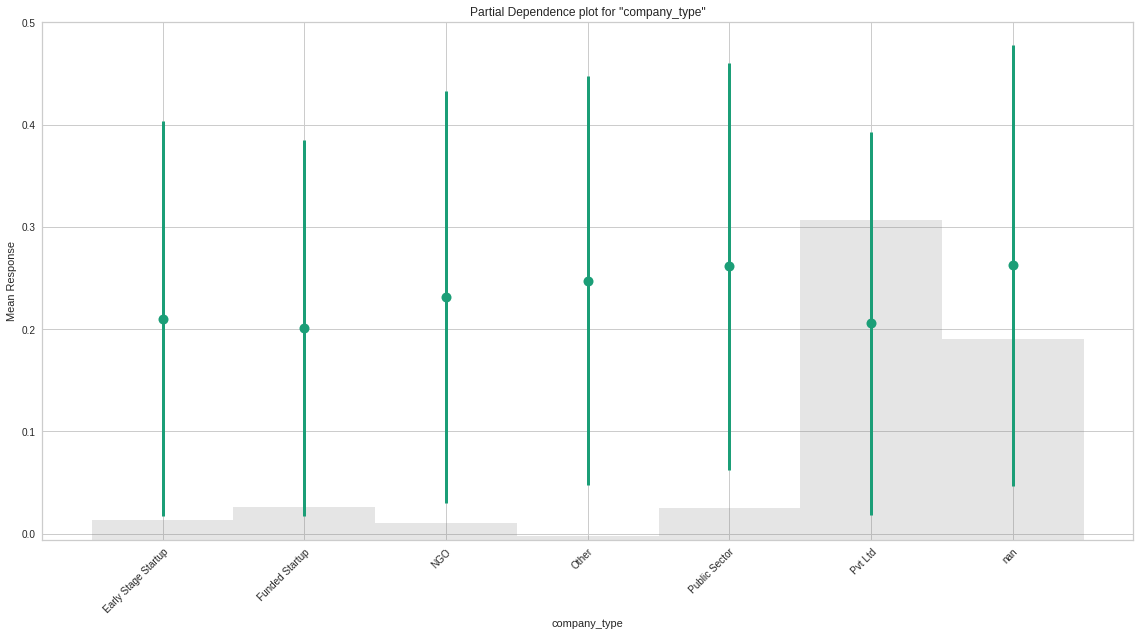

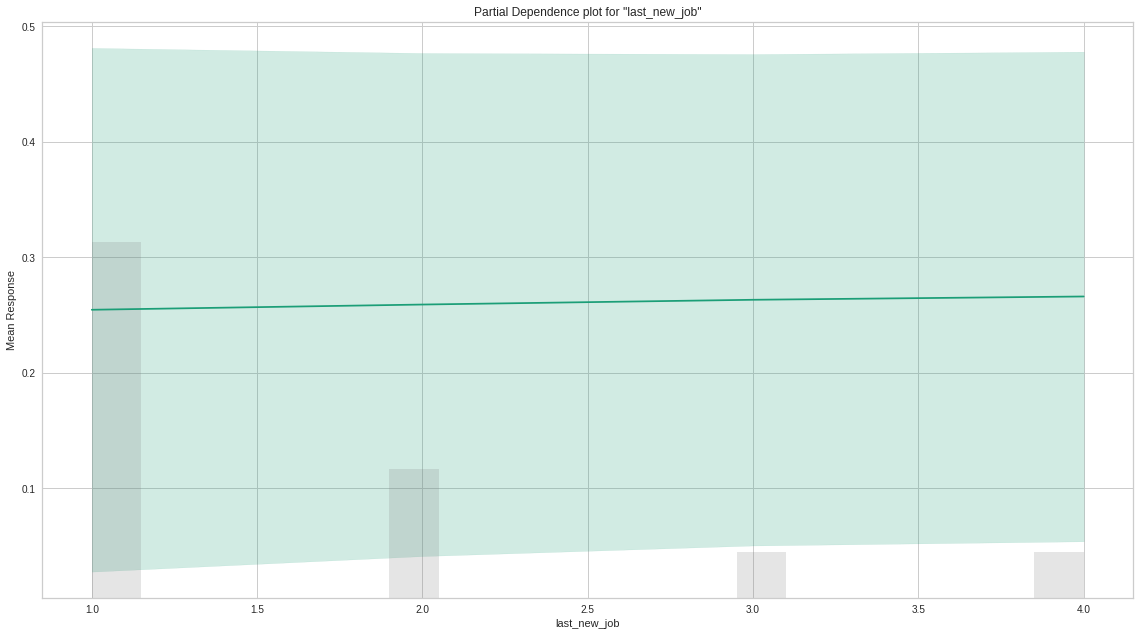

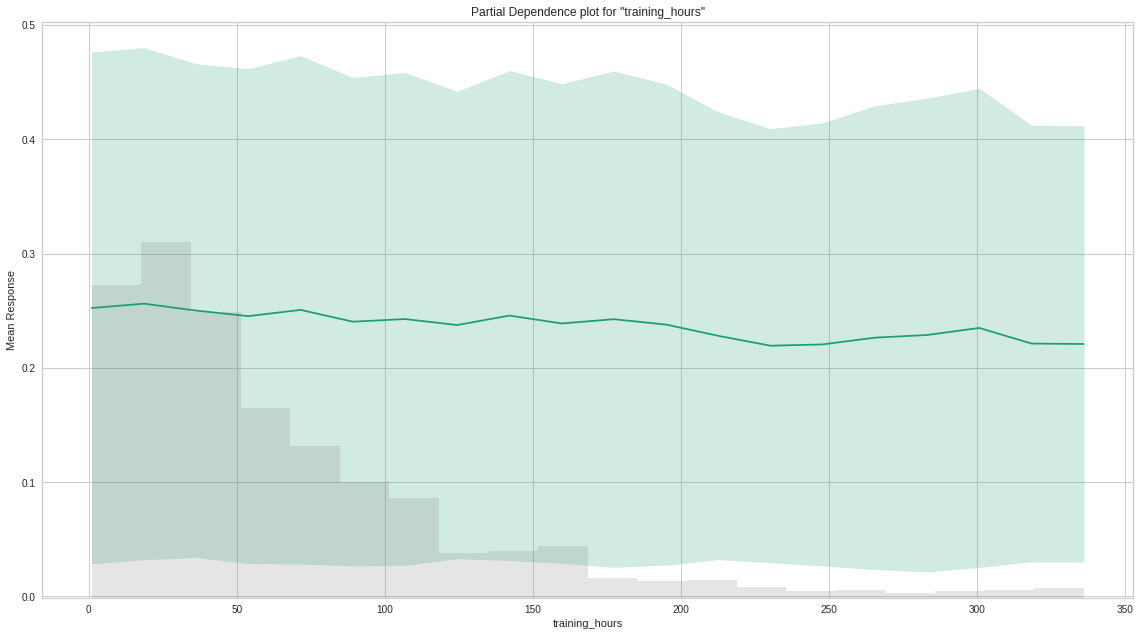

In [30]:
# Descripcion de todos los modelos entrenados
exa = aml.leader.explain(df)